# Providing Google Cloud credentials to the runtime

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.cloud import bigquery

In [ ]:
project_id = 'homework1-cloud-data-mining'

In [ ]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
client = bigquery.Client(project=project_id)

# NCAA Bigquery dataset

In [ ]:
data_rf = client.dataset("ncaa_basketball", project="bigquery-public-data")

data = client.get_dataset(data_rf)

# List of tables

In [ ]:
t = list(client.list_tables(data))
for table in t:  
    print(table.table_id)

mascots
mbb_games_sr
mbb_historical_teams_games
mbb_historical_teams_seasons
mbb_historical_tournament_games
mbb_pbp_sr
mbb_players_games_sr
mbb_teams
mbb_teams_games_sr
team_colors


In [ ]:
#Constructing a refernce of the whole table
a = data_rf.table(table_id='mbb_games_sr')

In [ ]:
table = client.get_table(a)

In [ ]:
client.list_rows(table, max_results=15).to_dataframe()

,game_id,season,status,coverage,neutral_site,scheduled_date,gametime,conference_game,tournament,tournament_type,...,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,a_team_tech_fouls,a_coach_tech_fouls,created
0,b4451a02-26c5-4005-9ac8-b06c1f71e661,2015,closed,full,None,2015-11-24,2015-11-24 21:30:00+00:00,None,None,None,...,36,17,0,31.0,5,0,0,0,0,2018-02-20 15:48:58+00:00
1,b2f579ca-9eff-4b2b-a747-81169399c2e8,2015,closed,full,None,2015-11-24,2015-11-24 02:00:00+00:00,None,None,None,...,16,25,0,25.0,1,0,0,0,0,2018-02-20 15:48:53+00:00
2,571be71c-a5bf-446e-bf21-30eb6c54ac5e,2015,closed,full,None,2015-11-25,2015-11-25 19:30:00+00:00,None,None,None,...,6,6,0,12.0,0,0,0,0,0,2018-02-20 15:48:58+00:00
3,d6617923-0b23-49e4-af9b-9e4d0243e45c,2015,closed,full,None,2015-12-19,2015-12-19 04:00:00+00:00,None,None,None,...,2,13,1,15.0,3,0,0,0,0,2018-02-20 15:48:53+00:00
4,ffb463a4-dd3c-4ed9-b503-311b95ef0295,2015,closed,full,None,2015-12-20,2015-12-20 04:00:00+00:00,None,None,None,...,6,7,0,NaN,0,0,0,0,0,2018-02-20 15:48:53+00:00
5,1063177e-e168-4055-bdbf-a7fd1e33f398,2015,closed,full,None,2016-03-17,2016-03-17 17:30:00+00:00,None,NCAA,South Regional,...,8,11,0,18.0,2,0,0,0,0,2018-02-20 15:45:35+00:00
6,60b9ce90-41cb-4158-8038-1f9f80b374a5,2015,closed,full,None,2016-03-18,2016-03-18 17:30:00+00:00,None,NCAA,West Regional,...,12,9,0,4.0,1,0,0,0,0,2018-02-20 15:45:35+00:00
7,267af1b7-9c86-4561-bf63-7a379cdaae6d,2015,closed,full,None,2016-03-18,2016-03-18 01:39:00+00:00,None,NCAA,South Regional,...,12,11,1,22.0,2,0,1,0,0,2018-02-20 15:45:32+00:00
8,81c3cf79-5160-4afd-9f51-7ad8e679b6c1,2015,closed,full,None,2016-01-04,2016-01-04 03:00:00+00:00,None,None,None,...,2,17,1,5.0,6,0,0,0,0,2018-02-20 15:48:58+00:00
9,d9cf6c1e-2125-4dbe-9c34-d0f8de911b10,2015,closed,full,None,2016-01-15,2016-01-15 04:00:00+00:00,None,None,None,...,2,10,0,14.0,4,0,0,0,0,2018-02-20 15:48:54+00:00


In [ ]:
data_games = client.query("""
        SELECT *
        FROM `bigquery-public-data.ncaa_basketball.mbb_games_sr`
        """)

In [ ]:
mbb_games_sr = data_games.to_dataframe()
mbb_games_sr.head()

,game_id,season,status,coverage,neutral_site,scheduled_date,gametime,conference_game,tournament,tournament_type,...,a_fast_break_pts,a_second_chance_pts,a_team_turnovers,a_points_off_turnovers,a_team_rebounds,a_flagrant_fouls,a_player_tech_fouls,a_team_tech_fouls,a_coach_tech_fouls,created
0,b4451a02-26c5-4005-9ac8-b06c1f71e661,2015,closed,full,None,2015-11-24,2015-11-24 21:30:00+00:00,None,None,None,...,36.0,17.0,0.0,31.0,5.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:58+00:00
1,b2f579ca-9eff-4b2b-a747-81169399c2e8,2015,closed,full,None,2015-11-24,2015-11-24 02:00:00+00:00,None,None,None,...,16.0,25.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:53+00:00
2,571be71c-a5bf-446e-bf21-30eb6c54ac5e,2015,closed,full,None,2015-11-25,2015-11-25 19:30:00+00:00,None,None,None,...,6.0,6.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:58+00:00
3,d6617923-0b23-49e4-af9b-9e4d0243e45c,2015,closed,full,None,2015-12-19,2015-12-19 04:00:00+00:00,None,None,None,...,2.0,13.0,1.0,15.0,3.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:53+00:00
4,ffb463a4-dd3c-4ed9-b503-311b95ef0295,2015,closed,full,None,2015-12-20,2015-12-20 04:00:00+00:00,None,None,None,...,6.0,7.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:53+00:00


In [ ]:
data_historic = client.query( """
        SELECT *
        FROM `bigquery-public-data.ncaa_basketball.mbb_historical_teams_seasons`
        """)
mbb_historic_sr = data_historic.to_dataframe()
mbb_historic_sr.head()

,season,market,name,team_code,team_id,alias,division,current_division,wins,losses,ties
0,1956,None,None,296,None,None,1,None,0,0,0
1,1903,None,None,137,None,None,1,None,7,0,0
2,1908,None,None,137,None,None,1,None,12,0,0
3,2006,None,None,28593,None,None,1,None,0,0,0
4,1908,None,None,479,None,None,1,None,13,0,0


In [ ]:
data_players = client.query("""
        SELECT *
        FROM `bigquery-public-data.ncaa_basketball.mbb_players_games_sr`
        """)
mbb_players_sr = data_players.to_dataframe()
mbb_players_sr.head()

,game_id,season,neutral_site,scheduled_date,gametime,tournament,tournament_type,tournament_round,tournament_game_no,player_id,...,assists,turnovers,steals,blocks,assists_turnover_ratio,personal_fouls,tech_fouls,flagrant_fouls,points,sp_created
0,14ab9c26-b586-4f68-8989-f433bb3a3e7f,2017,False,2017-11-22,2017-11-22 00:00:00+00:00,None,None,None,None,b8df0122-7f1e-4189-a47b-1e08050bf6c6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 13:03:24+00:00
1,64667cdd-9379-4ecc-877a-3fb4d76fbff2,2017,False,2017-12-19,2017-12-19 01:00:00+00:00,None,None,None,None,2036297a-f0e1-4d65-8cc2-94d3d4de314f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 13:03:27+00:00
2,fcc2decd-b14f-4fed-8a78-8856c6689c74,2017,False,2017-11-12,2017-11-12 18:00:00+00:00,None,None,None,None,c367fd91-183a-4d7d-9307-b8a289cb7bc9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 13:03:23+00:00
3,7cda8dca-e87b-4b4e-9eed-68cfba948957,2017,False,2017-11-26,2017-11-26 21:30:00+00:00,None,None,None,None,0ca3800d-fb89-4151-90c0-a3e03835fd04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 13:03:26+00:00
4,b3b15b00-c5a6-4239-9c99-713ebe01b8c7,2017,False,2018-01-24,2018-01-24 01:00:00+00:00,None,None,None,None,269dc916-2208-40e2-a5ee-062a38a3a00d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 13:03:21+00:00


In [ ]:
data_teams = client.query("""
        SELECT *
        FROM `bigquery-public-data.ncaa_basketball.mbb_teams_games_sr`
        """)
mbb_teams_sr = data_teams.to_dataframe()
mbb_teams_sr.head()

,game_id,season,status,coverage,neutral_site,scheduled_date,gametime,conference_game,tournament,tournament_type,...,opp_fast_break_pts,opp_second_chance_pts,opp_team_turnovers,opp_points_off_turnovers,opp_team_rebounds,opp_flagrant_fouls,opp_player_tech_fouls,opp_team_tech_fouls,opp_coach_tech_fouls,created
0,4069f80e-04f0-4f69-a563-86014bbe95a0,2015,closed,full,None,2015-12-03,2015-12-03 03:00:00+00:00,None,None,None,...,0.0,17.0,0.0,31.0,7.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:54+00:00
1,7160a0e0-bbc3-46ad-afc6-e4e6b5b90a51,2015,closed,full,None,2016-01-17,2016-01-17 02:00:00+00:00,None,None,None,...,21.0,16.0,1.0,30.0,3.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:54+00:00
2,320ccf7a-8a32-4ce6-a561-10687985c6a6,2015,closed,full,None,2015-12-22,2015-12-22 20:00:00+00:00,None,None,None,...,26.0,16.0,0.0,36.0,4.0,0.0,0.0,0.0,0.0,2018-02-20 15:48:53+00:00
3,1a689aee-fec2-49df-822d-993e2826744b,2017,closed,full,False,2017-12-10,2017-12-10 00:00:00+00:00,False,None,None,...,8.0,21.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,2018-02-20 13:03:23+00:00
4,6314105c-8456-4b35-bfbf-1ec04749ff09,2017,closed,full,False,2017-12-09,2017-12-09 21:00:00+00:00,False,None,None,...,8.0,15.0,0.0,19.0,2.0,0.0,0.0,0.0,0.0,2018-02-20 13:03:24+00:00


In [ ]:
data_tournament = client.query("""
        SELECT *
        FROM `bigquery-public-data.ncaa_basketball.mbb_historical_tournament_games`
        """)
mbb_tournament_sr = data_tournament.to_dataframe()
mbb_tournament_sr.head()

,season,round,days_from_epoch,game_date,day,win_seed,win_region,win_market,win_name,win_alias,...,lose_market,lose_name,lose_alias,lose_team_id,lose_school_ncaa,lose_code_ncaa,lose_kaggle_team_id,lose_pts,num_ot,academic_year
0,1994,16,8849,1994-03-25,Friday,09,W,Boston College,Eagles,BC,...,Indiana,Hoosiers,IND,c3f0a8ce-af67-497f-a750-3b859376b20a,Indiana,306,1231,68,0,1993
1,2007,64,13587,2007-03-15,Thursday,07,W,Boston College,Eagles,BC,...,Texas Tech,Red Raiders,TTU,f8c705b7-87d3-411a-9c8b-5124daab0469,Texas Tech,700,1403,75,0,2006
2,2001,64,11396,2001-03-15,Thursday,03,W,Boston College,Eagles,BC,...,Southern Utah,Thunderbirds,SUU,c7116621-45ed-4ab1-9ad9-dee524120569,Southern Utah,667,1381,65,0,2000
3,1994,64,8842,1994-03-18,Friday,09,W,Boston College,Eagles,BC,...,Washington State,Cougars,WSU,2d4f0015-adb4-4877-8c15-4a6eed7eed03,Washington St.,754,1450,64,0,1993
4,1994,32,8844,1994-03-20,Sunday,09,W,Boston College,Eagles,BC,...,North Carolina,Tar Heels,UNC,e9ca48b2-00ba-41c0-a02b-6885a2da1ff1,North Carolina,457,1314,72,0,1993


In [ ]:
type(mbb_games_sr)

pandas.core.frame.DataFrame

In [ ]:
type(mbb_players_sr)

pandas.core.frame.DataFrame

In [ ]:
type(mbb_historic_sr)

pandas.core.frame.DataFrame

In [ ]:
np.sum(mbb_games_sr.isnull()).max()

29152

In [ ]:
mbb_games_sr.isnull().sum()

game_id                    0
season                     0
status                     0
coverage                   0
neutral_site           17827
                       ...  
a_flagrant_fouls        4010
a_player_tech_fouls     4010
a_team_tech_fouls      17768
a_coach_tech_fouls     18581
created                    0
Length: 132, dtype: int64

In [ ]:
np.sum(mbb_historic_sr.isnull()).max()

16914

In [ ]:
mbb_historic_sr.isnull().sum()

season                  0
market              10348
name                16914
team_code               0
team_id             10348
alias               16914
division                0
current_division    16914
wins                    0
losses                  0
ties                    0
dtype: int64

In [ ]:
np.sum(mbb_players_sr.isnull()).max()

869006

In [ ]:
mbb_players_sr.isnull().sum()

game_id                0
season                 0
neutral_site      522362
scheduled_date         0
gametime               0
                   ...  
personal_fouls    256983
tech_fouls        328224
flagrant_fouls    548595
points            256637
sp_created             0
Length: 66, dtype: int64

In [ ]:
mbb_games_sr.shape

(29805, 132)

In [ ]:
mbb_historic_sr.shape

(54884, 11)

In [ ]:
mbb_players_sr.shape

(888844, 66)

# Correlation Matrix

In [ ]:
correlation = mbb_historic_sr.corr()

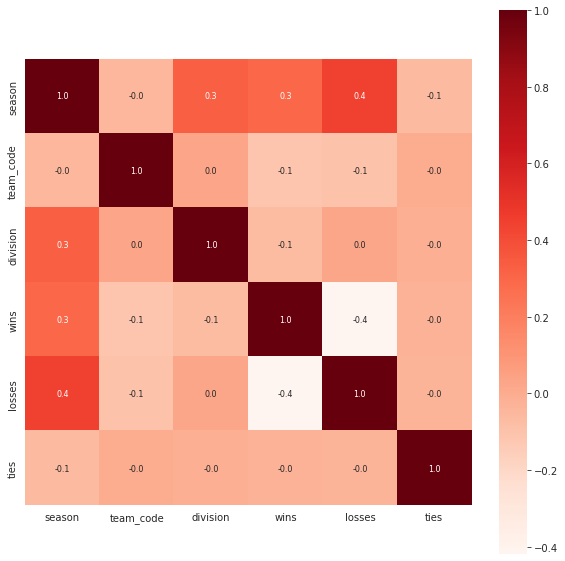

In [ ]:
#Constructing a Heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [ ]:
correlation_1 = mbb_teams_sr.corr()

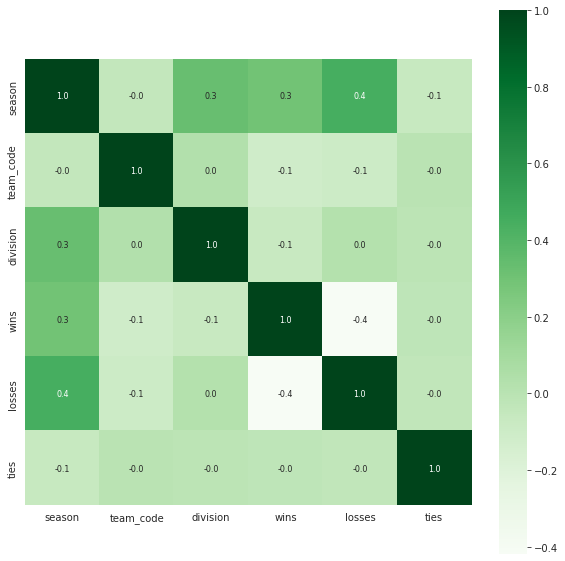

In [ ]:
#Constructing a Heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

# Types of events in the tournament

In [ ]:
query = client.query("""SELECT
  event_type,
  COUNT(*) AS event_count
FROM `bigquery-public-data.ncaa_basketball.mbb_pbp_sr`
GROUP BY 1
ORDER BY event_count DESC""")


In [ ]:

evts_type = query.to_dataframe()
evts_type

,event_type,event_count
0,rebound,790490
1,twopointmiss,425422
2,turnover,410166
3,twopointmade,400648
4,freethrowmade,316637
5,assist,293403
6,threepointmiss,291935
7,personalfoul,243613
8,shootingfoul,183541
9,threepointmade,153967


# List of 5 games that has the most 3 point shots

In [ ]:
query1 = client.query("""SELECT
  scheduled_date,
  name,
  market,
  alias,
  three_points_att,
  three_points_made,
  three_points_pct,
  opp_name,
  opp_market,
  opp_alias,
  opp_three_points_att,
  opp_three_points_made,
  opp_three_points_pct,
  (three_points_made + opp_three_points_made) AS total_threes
FROM `bigquery-public-data.ncaa_basketball.mbb_teams_games_sr`
WHERE season > 2015
ORDER BY total_threes DESC
LIMIT 5""")


In [ ]:
most_3_pts = query1.to_dataframe()
most_3_pts


,scheduled_date,name,market,alias,three_points_att,three_points_made,three_points_pct,opp_name,opp_market,opp_alias,opp_three_points_att,opp_three_points_made,opp_three_points_pct,total_threes
0,2016-11-18,Tigers,Savannah State,SAV,52,24,46.2,Knights,Middle Georgia,MGC,38,16,42.1,40
1,2016-11-18,Knights,Middle Georgia,MGC,38,16,42.1,Tigers,Savannah State,SAV,52,24,46.2,40
2,2016-11-22,Tigers,Savannah State,SAV,45,23,51.1,Wildcats,Fort Valley State,FVSU,39,14,35.9,37
3,2016-11-22,Wildcats,Fort Valley State,FVSU,39,14,35.9,Tigers,Savannah State,SAV,45,23,51.1,37
4,2017-12-10,Skyhawks,Tennessee-Martin,UTM,35,15,42.9,Cougars,Cincinnati Clermont,CINC,51,21,41.2,36


# Top 5 stadiums which have highest seat capacity

In [ ]:
query2 = client.query("""SELECT
  venue_name, venue_capacity, venue_city, venue_state
FROM `bigquery-public-data.ncaa_basketball.mbb_teams_games_sr`
GROUP BY 4,3,2,1
ORDER BY venue_capacity DESC
LIMIT 5""")




In [ ]:
high_seating = query2.to_dataframe()
high_seating

,venue_name,venue_capacity,venue_city,venue_state
0,AT&T Stadium,80000,Arlington,TX
1,University of Phoenix Stadium,72220,Glendale,AZ
2,NRG Stadium,71054,Houston,TX
3,Georgia Dome,71000,Atlanta,GA
4,Lucas Oil Stadium,70000,Indianapolis,IN


# Since 2015 which teams has the highest score

In [ ]:
query3 = client.query("""SELECT
  scheduled_date,
  name,
  market,
  alias,
  points_game AS team_points,
  opp_name,
  opp_market,
  opp_alias,
  opp_points_game AS opposing_team_points,
  points_game + opp_points_game AS point_total
FROM `bigquery-public-data.ncaa_basketball.mbb_teams_games_sr`
WHERE season > 2015
ORDER BY point_total DESC
LIMIT 5""")

In [ ]:
high_score = query3.to_dataframe()
high_score

,scheduled_date,name,market,alias,team_points,opp_name,opp_market,opp_alias,opposing_team_points,point_total
0,2017-02-10,Terriers,Wofford,WOF,131,Bulldogs,Samford,SAM,127,258
1,2017-02-10,Bulldogs,Samford,SAM,127,Terriers,Wofford,WOF,131,258
2,2017-02-04,Eagles,Eastern Washington,EWU,130,Vikings,Portland State,PRST,124,254
3,2017-02-04,Vikings,Portland State,PRST,124,Eagles,Eastern Washington,EWU,130,254
4,2016-12-03,Seahawks,North Carolina-Wilmington,UNCW,126,Falcons,Pfeiffer,PU,113,239


Histogram

In [ ]:
win_seed_sort = mbb_tournament_sr[mbb_tournament_sr['round'] != 68]
win_seed_sort = win_seed_sort.sort_values('win_seed')

# Winning seed histogram from 1984-2017

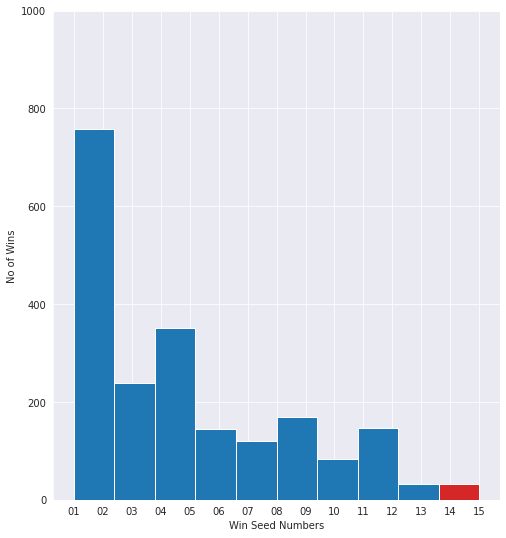

In [ ]:
fig, ax = plt.subplots(figsize = (8,9))

n, bin1, patches = ax.hist(win_seed_sort['win_seed'], label = 'Win Seed Number', color = 'tab:blue', bins = 10)

patches[9].set_fc('tab:red')

ax.set_ylabel("No of Wins")
ax.set_xlabel("Win Seed Numbers")
ax.set_ylim(0, 1000)

plt.show()

BarPlot

In [ ]:
schools, wins = np.unique(win_seed_sort['win_school_ncaa'], return_counts = True)

# Schools with >50 wins in the tournament

In [ ]:
shl_wins = pd.DataFrame(schools, wins).reset_index()
shl_wins.columns = ['number_wins', 'school']
shl_wins_gt50 = shl_wins[shl_wins['number_wins'] > 50]

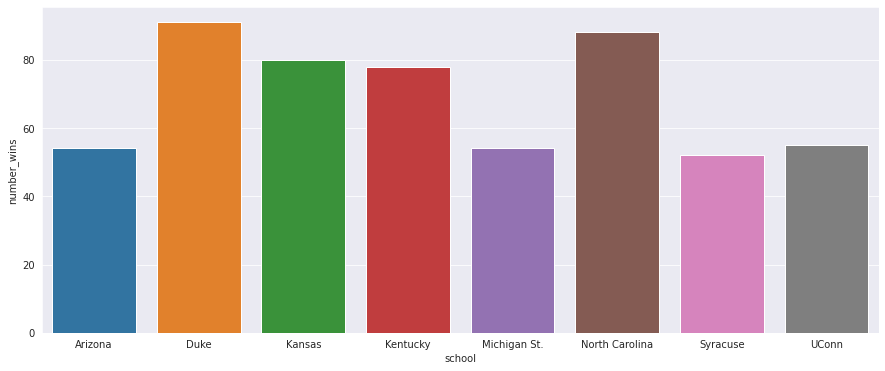

In [ ]:
fig, ax = plt.subplots(figsize = (15,6))
sns.barplot(data = shl_wins_gt50, x = 'school', y = 'number_wins')


# Scatter plot

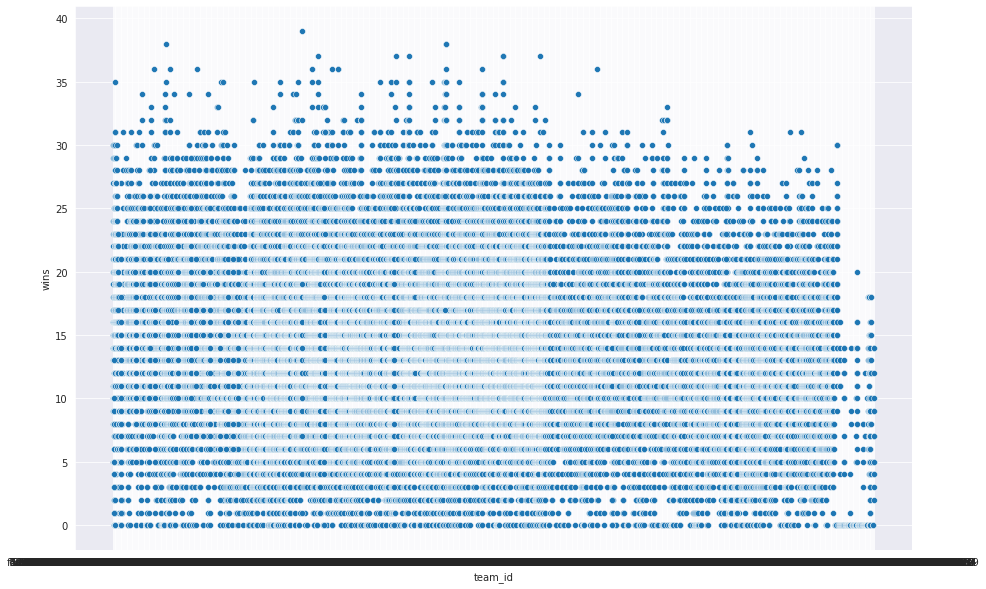

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.scatterplot(x='team_id',y='wins',data=mbb_historic_sr,linewidth=0.5)

# Save dataframe back to Bigquery

In [ ]:
output_dataset_id = 'homework_1'

output_table_id = 'homework_1_info' 

replace_or_append_output = 'replace' #['replace', 'append']

# Combine project and dataset
project_dataset = (client.project + '.' + output_dataset_id)

# Check to make sure output dataset exists, create it if not
try:
  client.get_dataset(output_dataset_id)
  print("Dataset " + project_dataset + " exists\n")
 
except:
  print("Dataset " + project_dataset + " doesn't exist, so creating it\n")
  dataset = client.create_dataset(bigquery.Dataset(project_dataset))

Dataset homework1-cloud-data-mining.homework_1 doesn't exist, so creating it



In [ ]:
for dataset in client.list_datasets():
  print(dataset.dataset_id)

homework_1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
